In [95]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [96]:
df=pd.read_csv(r"C:\Users\hp\Downloads\jupyter\blackfriday.csv")
df.head()
# df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [98]:
df.info() #this is to get the basic information about the dataset what it possess and everything that we can from this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29117 entries, 0 to 29116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     29117 non-null  int64  
 1   Product_ID                  29117 non-null  object 
 2   Gender                      29116 non-null  object 
 3   Age                         29116 non-null  object 
 4   Occupation                  29116 non-null  float64
 5   City_Category               29116 non-null  object 
 6   Stay_In_Current_City_Years  29116 non-null  object 
 7   Marital_Status              29116 non-null  float64
 8   Product_Category_1          29116 non-null  float64
 9   Product_Category_2          19903 non-null  float64
 10  Product_Category_3          8812 non-null   float64
 11  Purchase                    29116 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.7+ MB


In [99]:
df.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2             9214
Product_Category_3            20305
Purchase                          1
dtype: int64

In [100]:
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
impute.fit(df.iloc[:,9:11].values)
df.iloc[:,9:11]=impute.transform(df.iloc[:,9:11].values)

In [101]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [102]:
df=df.dropna()

In [103]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Now we will start the analysis

### Analysing the columns

#### Finding the unique values in each of the column 

In [104]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


In [105]:
df['Product_ID'].nunique() #2883 unique ids are present

2883

In [106]:
df['User_ID'].nunique()

3908

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Occupation'].unique()

array([10., 16., 15.,  7., 20.,  9.,  1., 12., 17.,  0.,  3.,  4., 11.,
        8., 19.,  2., 18.,  5., 14., 13.,  6.])

In [15]:
df['City_Category'].unique() #maybe these A B C are represeting some cities name assumptions could be made if we want some tom!

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique() # 0 1nd 1 representing unmarried and married maybe!! can assume this

array([0., 1.])

In [18]:
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9.])

In [19]:
df['Purchase'].sum() #isko unique find krne ka there is no point ofc!

269465533.0

In [20]:
c=0
for column in df:
    print(column,":",df[column].nunique())
    c+=1

User_ID : 3908
Product_ID : 2883
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 9759


### Analysing Gender column

In [21]:
len(df[df['Gender']=='M'])

22466

In [22]:
len(df[df['Gender']=='F'])

6650

In [34]:
##creating the dataframe

In [23]:
df2=pd.DataFrame({'Frequency': [len(df[df['Gender']=='M']) , len(df[df['Gender']=='F'])]}, index=['Male',"Female"])

In [24]:
df1=pd.DataFrame({'Male': [len(df[df['Gender']=='M'])], 'Female': [len(df[df['Gender']=='F'])]}, index=['Frequnecy'])

In [25]:
df1

,Male,Female
Frequnecy,22466,6650


In [26]:
import seaborn as sns

<Axes: >

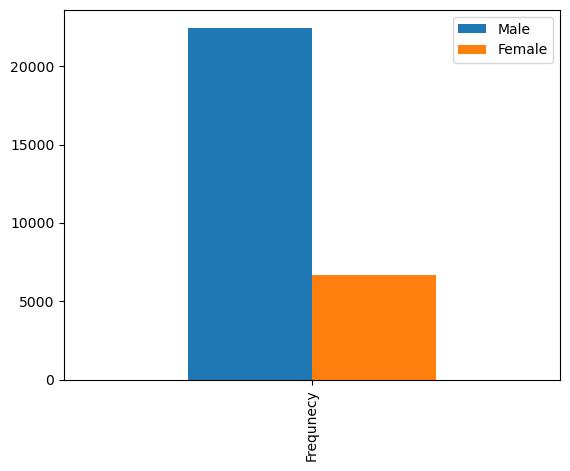

In [27]:
df1.plot(kind='bar')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


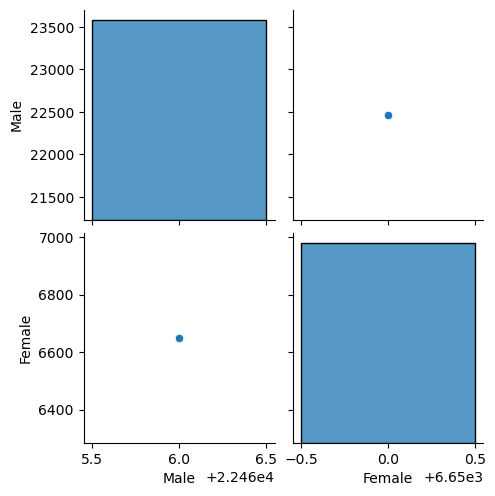

In [28]:
sns.pairplot(df1)

<Axes: ylabel='Frequency'>

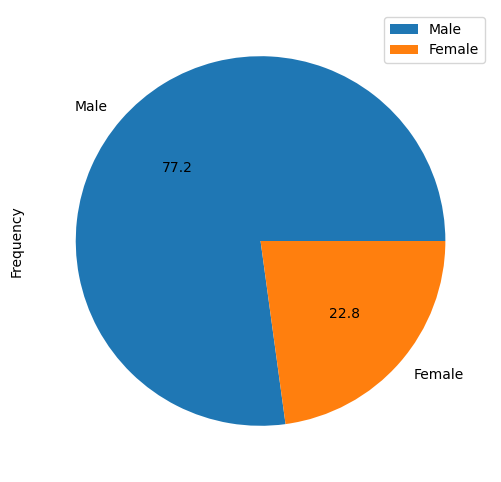

In [29]:
df2.plot(kind='pie',y="Frequency",autopct='%.1f',figsize=(6,6))

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


<Axes: title={'center': 'gender ratio'}>

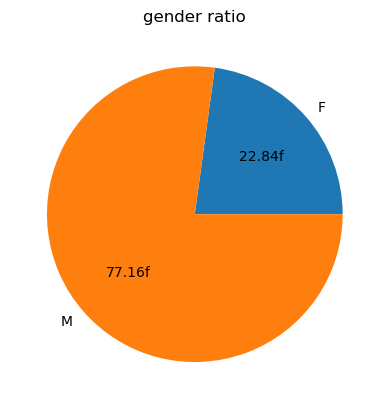

In [31]:
df.groupby('Gender').size().plot(y='Count',kind='pie',autopct='%.2ff',title="gender ratio")

In [32]:
df.groupby('Gender').sum()['Purchase']

Gender
F     57939150.0
M    211526383.0
Name: Purchase, dtype: float64

<Axes: title={'center': 'expenditure of gender'}, xlabel='Gender'>

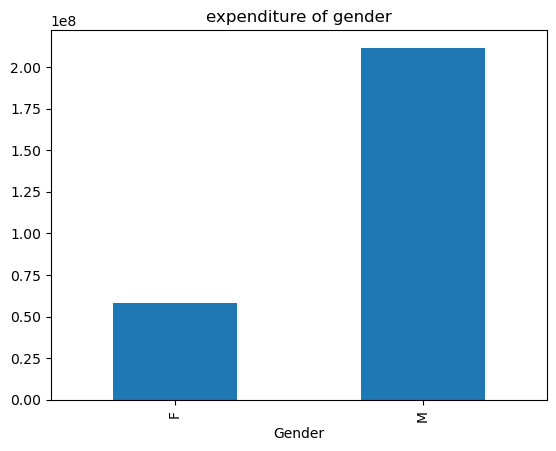

In [33]:
df.groupby('Gender').sum()['Purchase'].plot(kind="bar", title='expenditure of gender')

<Axes: title={'center': 'expenditure of gender'}, ylabel='Purchase'>

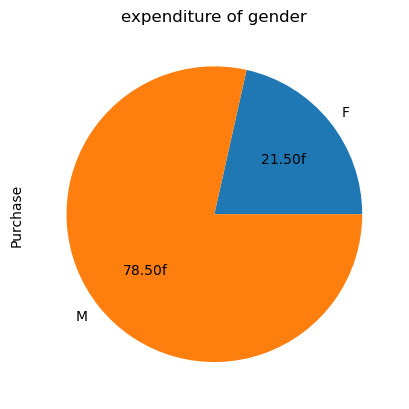

In [34]:
df.groupby('Gender').sum()['Purchase'].plot(kind="pie", title='expenditure of gender', autopct='%.2ff')

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


In [ ]:
# df.groupby('Gender').mean()['Purchase'].plot(kind="pie", title='mean of total expenditure of gender') idk why this code is not working!!

### Analysis on Age and Marital Status!

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


<Axes: xlabel='Age'>

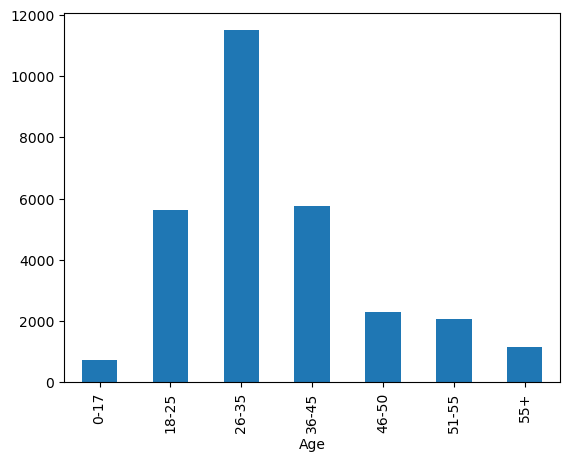

In [39]:
df.groupby('Age').size().plot(kind='bar') #this is telling that what age group is buying the products.

### Analysing details about the unique productts found in the particular age groups!

In [62]:
# for i in df.groupby('Age').size():
#     print(i,df[df['Age']==i].nunique())
lst=[]
for i in df['Age'].unique():
    lst.append((i,df[df['Age']==i]['Product_ID'].nunique()))
lst

[('0-17', 536),
 ('55+', 780),
 ('26-35', 2304),
 ('46-50', 1232),
 ('51-55', 1129),
 ('36-45', 1872),
 ('18-25', 1746)]

In [68]:
df3=pd.DataFrame(lst, columns=['Age',"Products"]) #datframe mai convert isliye kia taaki we can plot the necessary graphs!

In [69]:
df3

,Age,Products
0,0-17,536
1,55+,780
2,26-35,2304
3,46-50,1232
4,51-55,1129
5,36-45,1872
6,18-25,1746


In [65]:
# df3.rename(columns={'0':'Age','1':'Products'}, inplace=True) this is not working over here. pta nhi kyu????????

In [71]:
df3.head()

,Age,Products
0,0-17,536
1,55+,780
2,26-35,2304
3,46-50,1232
4,51-55,1129


<Axes: xlabel='Age'>

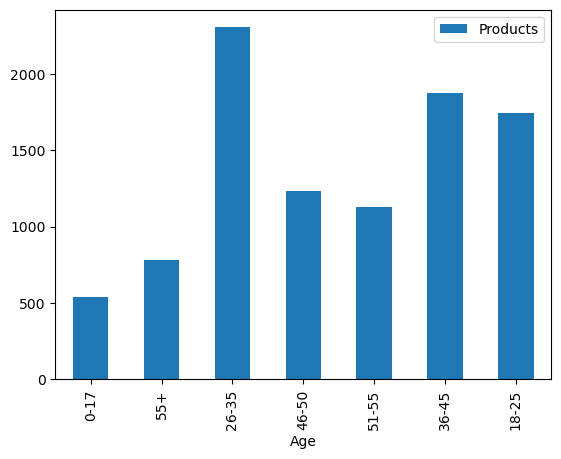

In [73]:
df3.plot(kind='bar',x='Age') #since yha age grops nhi aare

<Axes: xlabel='Age'>

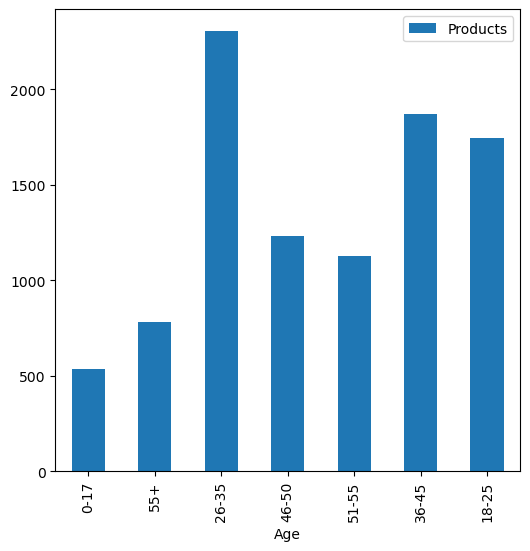

In [76]:
df3.plot.bar(x='Age',figsize=(6,6))

### Amount spend by the age Gruops

In [80]:
df.groupby('Age').sum()['Purchase']

Age
0-17       6703457.0
18-25     51463483.0
26-35    106053702.0
36-45     53746749.0
46-50     21089656.0
51-55     19721837.0
55+       10686649.0
Name: Purchase, dtype: float64

<Axes: title={'center': 'money spent by age'}, xlabel='Age'>

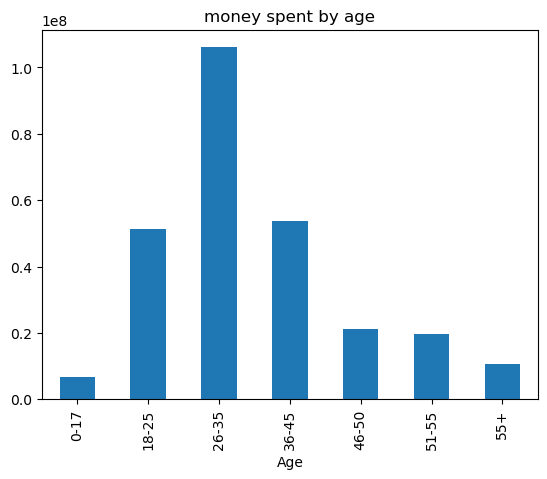

In [84]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',title="money spent by age")

In [ ]:
## Also do for tge unique pdts as well

In [93]:
df_new=df.drop_duplicates('Product_ID')

In [94]:
df_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


<Axes: title={'center': 'Money spent only on the unique products'}, xlabel='Age'>

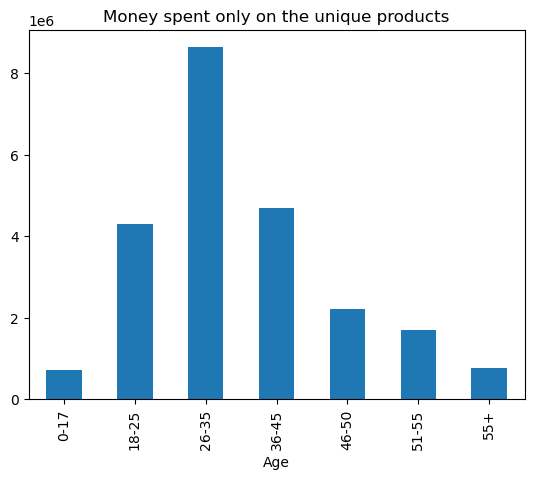

In [96]:
df_new.groupby('Age')['Purchase'].sum().plot(kind='bar',title='Money spent only on the unique products')

In [86]:
import matplotlib.pyplot as plt

In [88]:
df0=df.groupby('Age')['Purchase'].mean()

<Axes: ylabel='Purchase'>

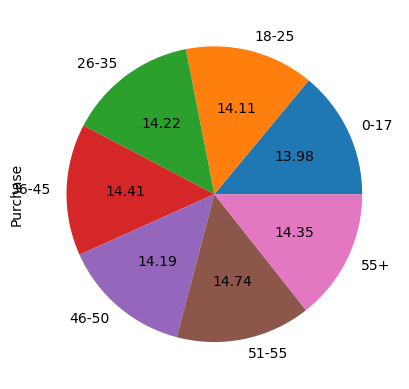

In [90]:
df0.plot(kind='pie',autopct='%.2f')

<Axes: title={'center': 'MArried and Unmarried people'}>

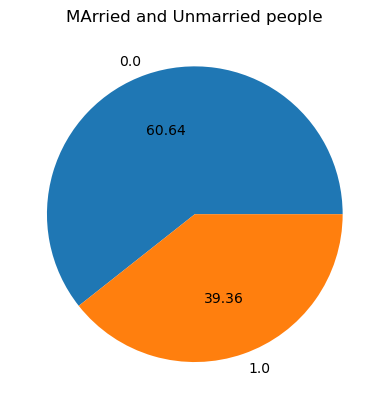

In [98]:
df.groupby('Marital_Status').size().plot(kind='pie',title='MArried and Unmarried people', autopct='%.2f')

<Axes: title={'center': 'MArried and Unmarried people'}, ylabel='Purchase'>

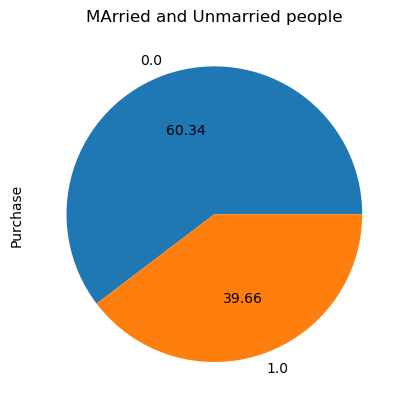

In [99]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind='pie',title='MArried and Unmarried people', autopct='%.2f')

<Axes: title={'center': 'MArried and Unmarried people money spent'}, xlabel='Marital_Status'>

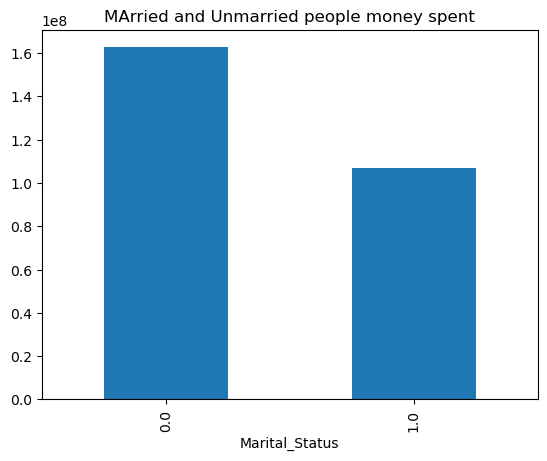

In [100]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind='bar',title='MArried and Unmarried people money spent')

### Analysing Multiple columns

In [11]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

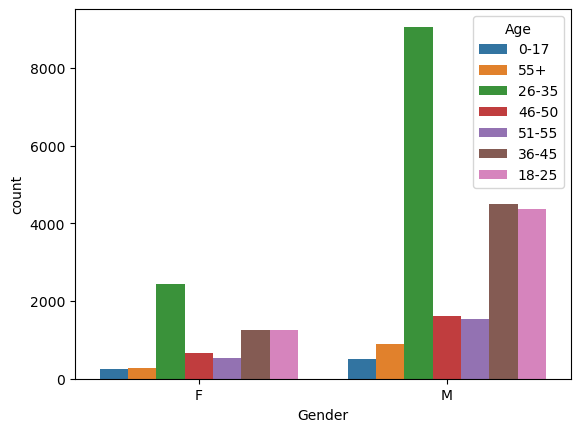

In [103]:
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

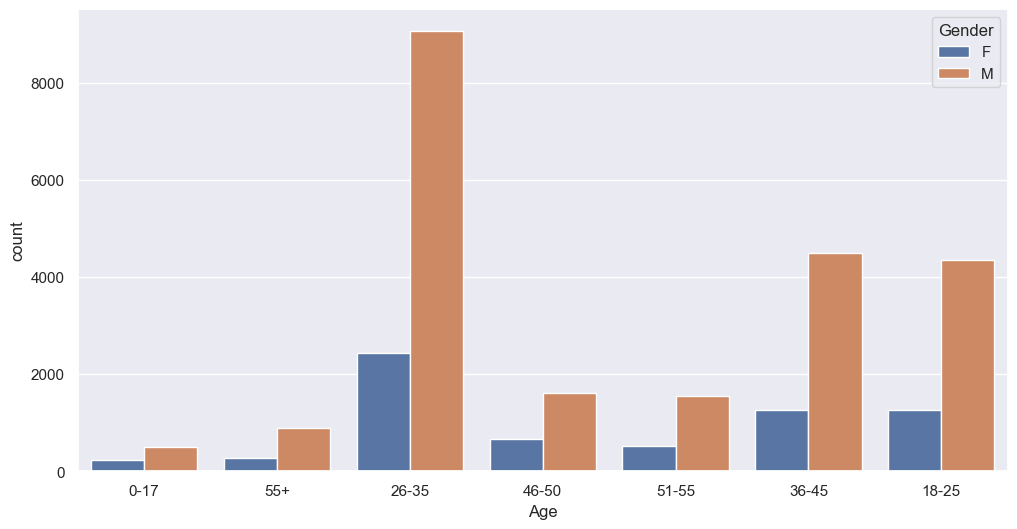

In [106]:
sns.set(rc={'figure.figsize': (12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

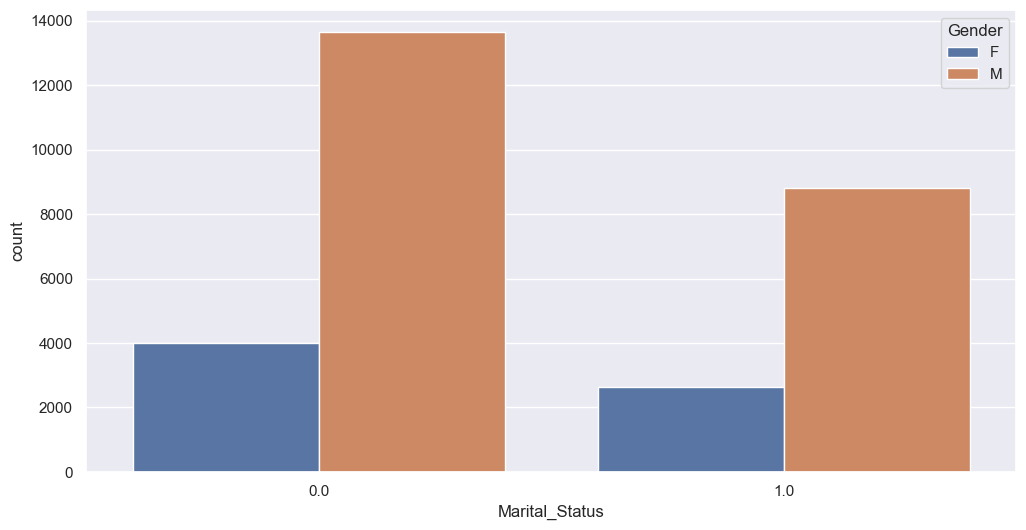

In [107]:
sns.set(rc={'figure.figsize': (12,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

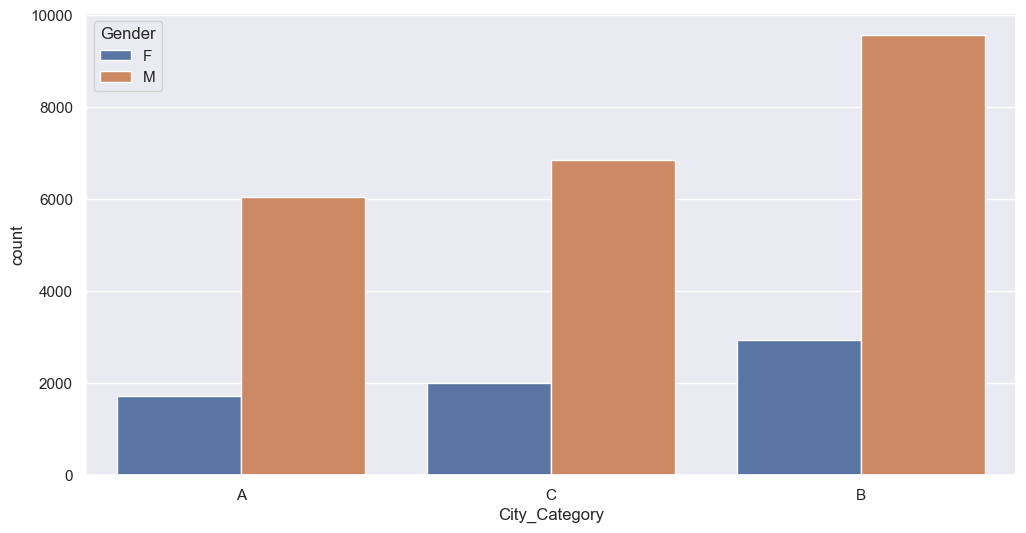

In [108]:
sns.set(rc={'figure.figsize': (12,6)})
sns.countplot(x='City_Category',hue='Gender',data=df)

<Axes: ylabel='Marital_Status'>

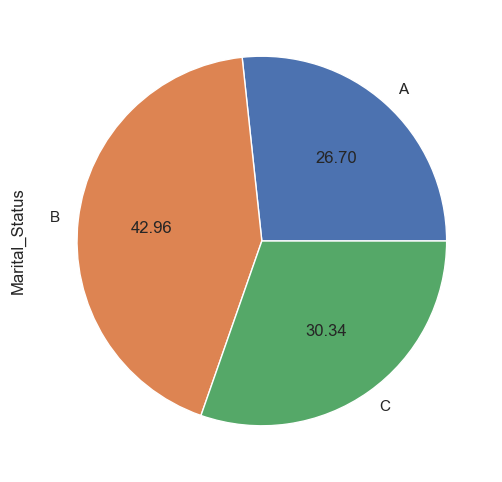

In [109]:
df.groupby('City_Category').count()['Marital_Status'].plot(kind='pie', autopct="%.2f")

<Axes: xlabel='City_Category', ylabel='count'>

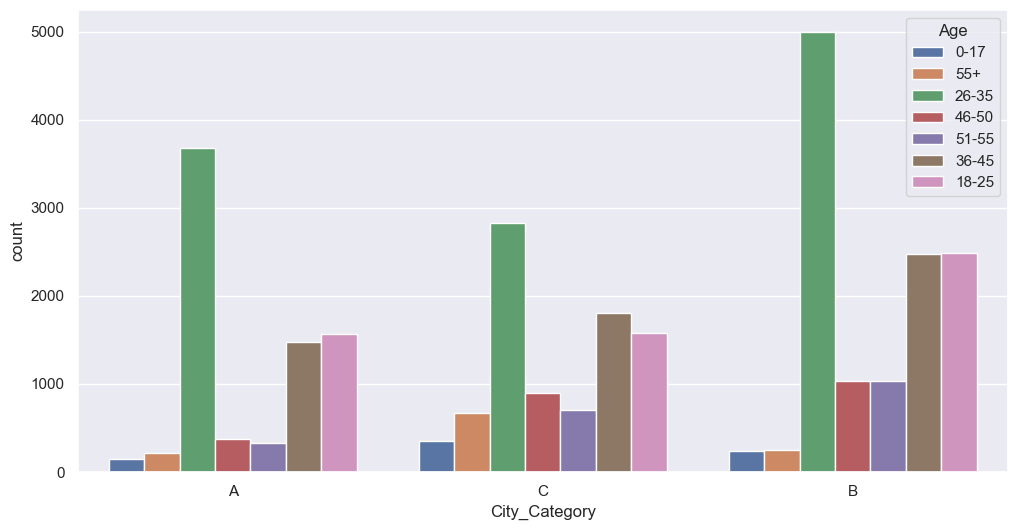

In [111]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

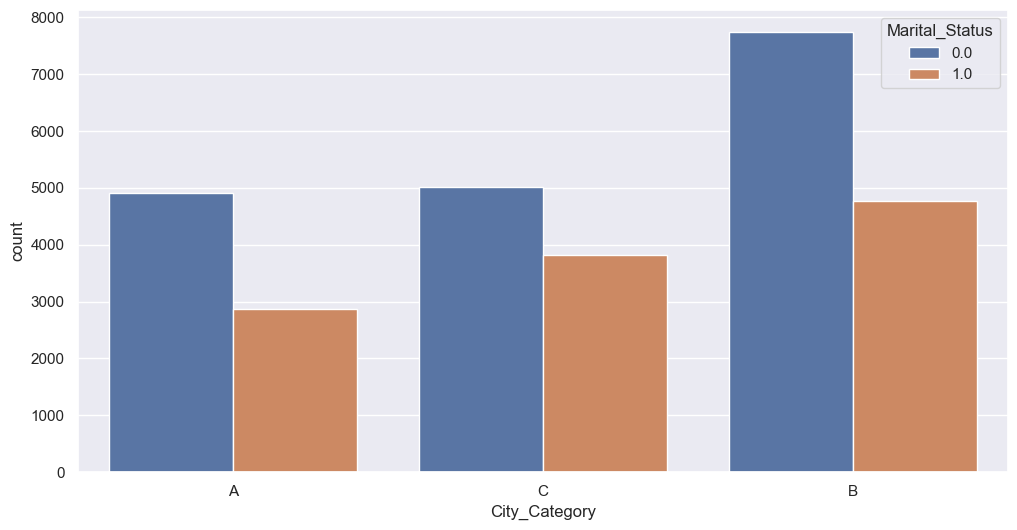

In [114]:
sns.countplot(x='City_Category',hue='Marital_Status',data=df)

In [121]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [141]:
df['Marital_Status']=df['Marital_Status'].astype(float)
# c=0
# for i in df['Gender'].unique():
#     if(i==df[df['Marital_Status']=='0']):
#         c+=1
# print(c)
# print(df.dtypes)

In [134]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [139]:
# df[df['Gender']=='M' & df['Marital_Status']=='0']
#idk why it is showing teh error

<Axes: ylabel='Purchase'>

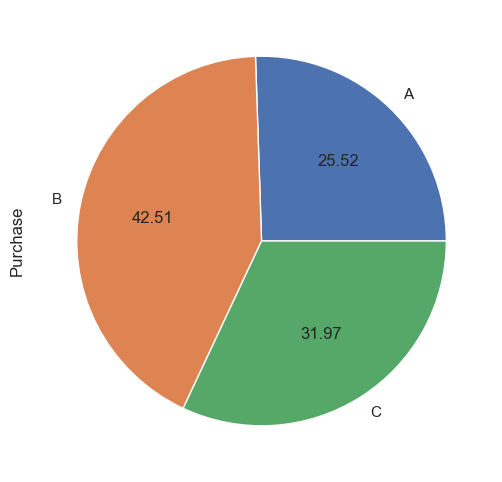

In [142]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Purchase'>

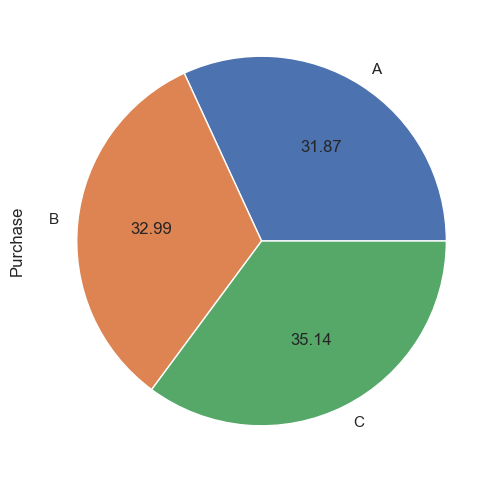

In [143]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%.2f')

As we can see that mean is almost similar for city a and b which indicated that a has purchased more and more products as well but on the other had b has purchased less but purchased the more of expensive pdts

In [ ]:
df.head()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

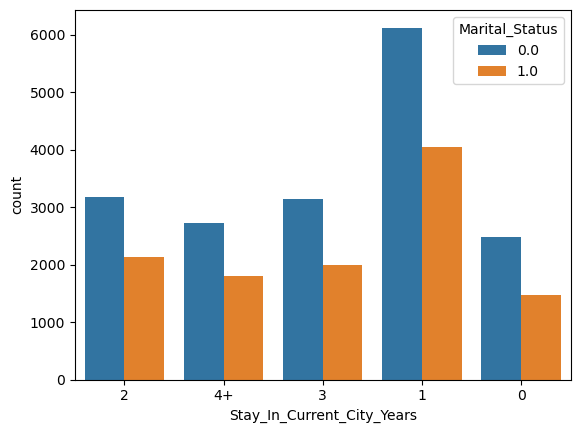

In [12]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

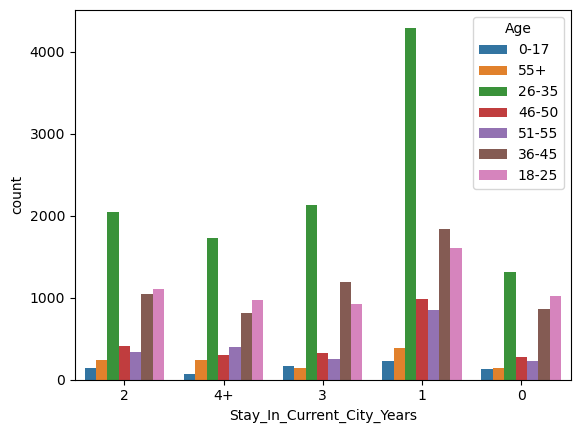

In [13]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Age', data=df)

<Axes: >

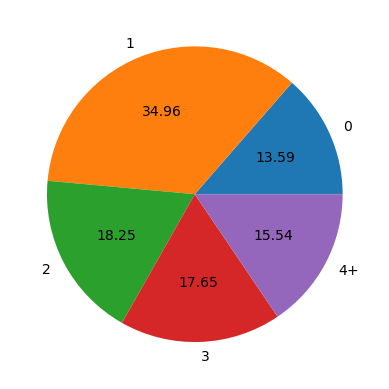

In [15]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Purchase'>

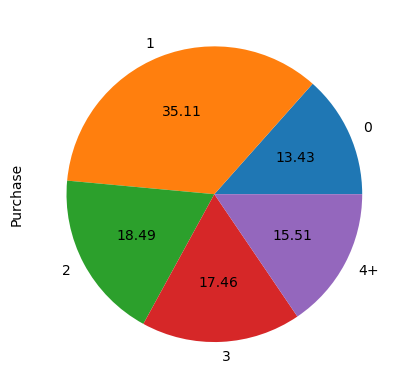

In [16]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

<Axes: title={'center': 'Money spent by the people satying for diff years'}, xlabel='Stay_In_Current_City_Years'>

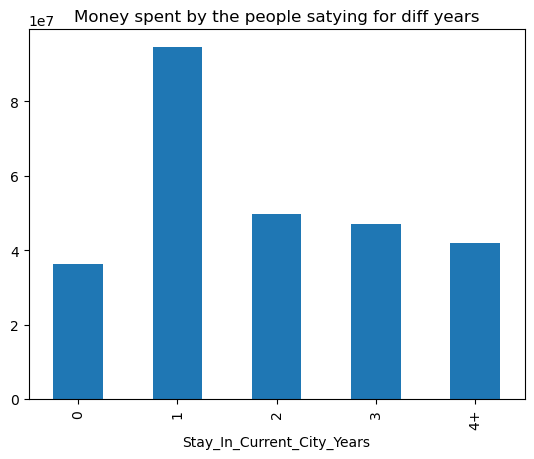

In [19]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='bar', title='Money spent by the people satying for diff years')

<Axes: title={'center': 'Money spent by the people satying for diff years'}, xlabel='Stay_In_Current_City_Years'>

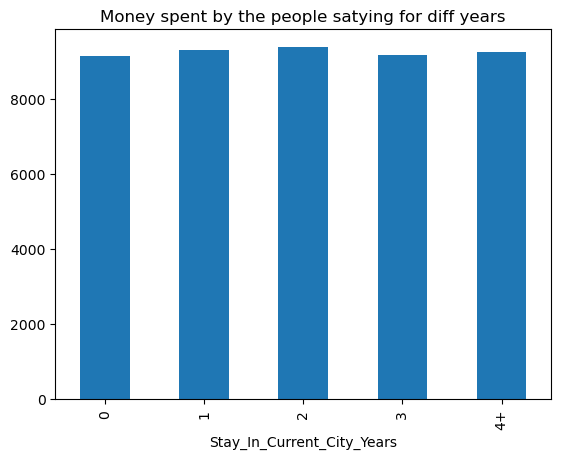

In [20]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar', title='Money spent by the people satying for diff years')

 here also the average is same which means people staying for 1 year buys more products spending more money and other peple buying less products and spending less money. Average expenditure will be same almost1 

<Axes: xlabel='Occupation', ylabel='count'>

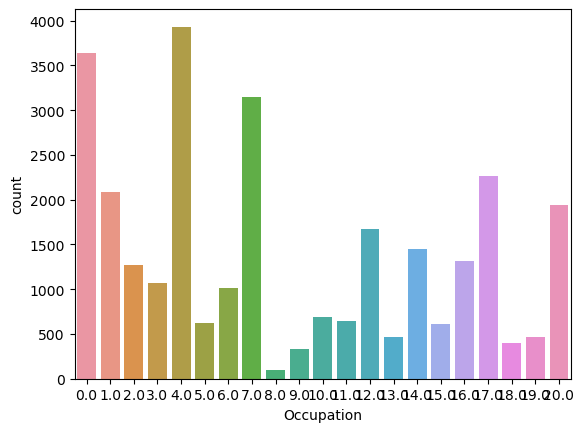

In [21]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

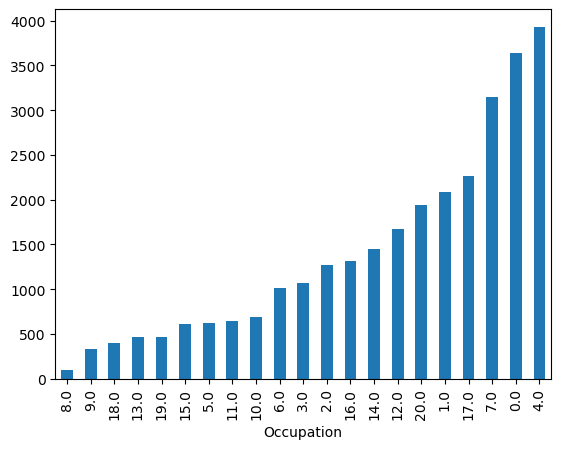

In [22]:
df.groupby('Occupation').size().sort_values().plot(kind='bar') #sorted graph present hojaega!

<Axes: xlabel='Occupation'>

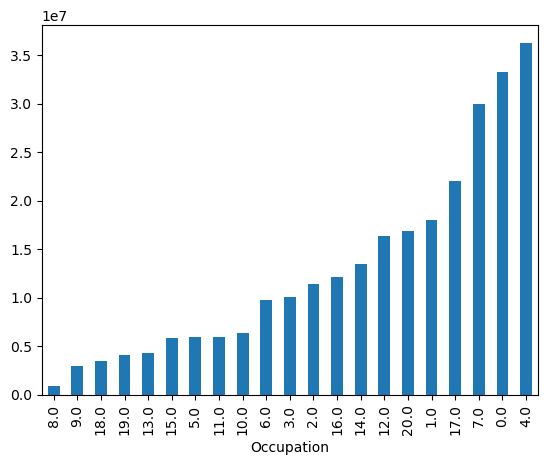

In [23]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')

In [24]:
df.groupby('Occupation')['Purchase'].sum()

Occupation
0.0     33230816.0
1.0     17960905.0
2.0     11447297.0
3.0     10060913.0
4.0     36270270.0
5.0      5939126.0
6.0      9739666.0
7.0     29912959.0
8.0       915267.0
9.0      2937714.0
10.0     6374511.0
11.0     5962213.0
12.0    16369006.0
13.0     4317972.0
14.0    13519469.0
15.0     5893398.0
16.0    12175726.0
17.0    22025812.0
18.0     3472099.0
19.0     4090295.0
20.0    16850099.0
Name: Purchase, dtype: float64

<Axes: xlabel='Occupation'>

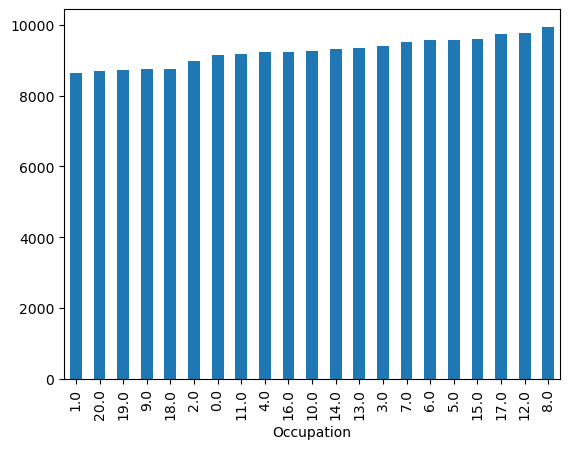

In [25]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar') #agin we can see taht mean is almost the same!

In [ ]:
#but the mean value jinka zayda hai they tend to buy expensive products rather than other occupation people

In [27]:
df.groupby('Occupation')['Purchase'].mean().sort_values() #per [product zayada pasie kharach krra hai menas buying the expensive products that is occupation number 8]

Occupation
1.0     8630.901009
20.0    8703.563533
19.0    8721.311301
9.0     8743.196429
18.0    8745.841310
2.0     8992.377848
0.0     9144.418272
11.0    9186.768875
4.0     9222.036613
16.0    9245.046317
10.0    9265.277616
14.0    9330.206349
13.0    9346.259740
3.0     9402.722430
7.0     9508.251430
6.0     9567.451866
5.0     9579.235484
15.0    9614.026101
17.0    9745.934513
12.0    9784.223551
8.0     9948.554348
Name: Purchase, dtype: float64

In [30]:
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0')])

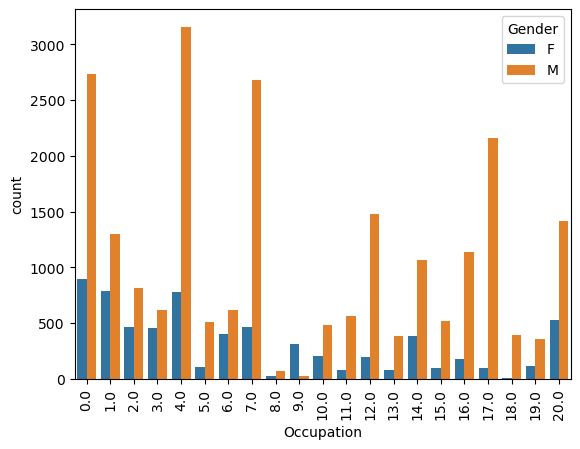

In [31]:
sns.countplot(x='Occupation',hue='Gender', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Occupation', ylabel='count'>

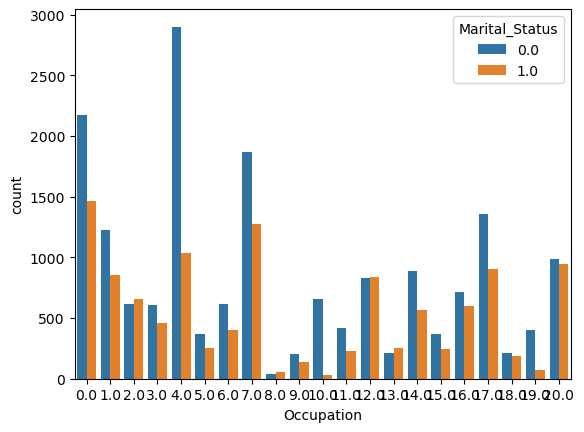

In [32]:
sns.countplot(x='Occupation',hue='Marital_Status', data=df)

<Axes: xlabel='Occupation'>

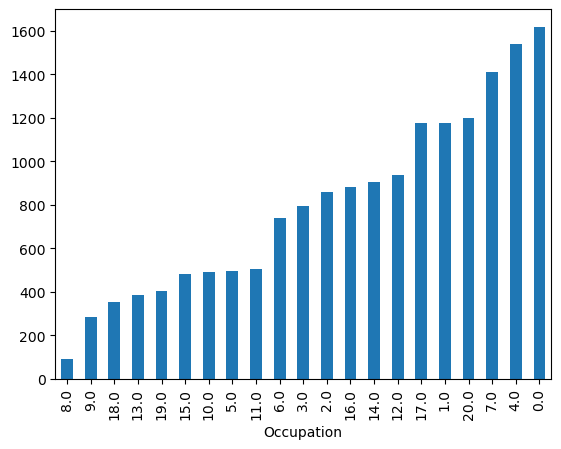

In [39]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar')

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


In [42]:
df.groupby('Product_Category_1').size()

Product_Category_1
1.0     7526
2.0     1237
3.0     1042
4.0      605
5.0     8186
6.0     1050
7.0      171
8.0     6047
9.0       20
10.0     255
11.0    1394
12.0     202
13.0     287
14.0      82
15.0     324
16.0     502
17.0      33
18.0     153
dtype: int64

<Axes: xlabel='Product_Category_1'>

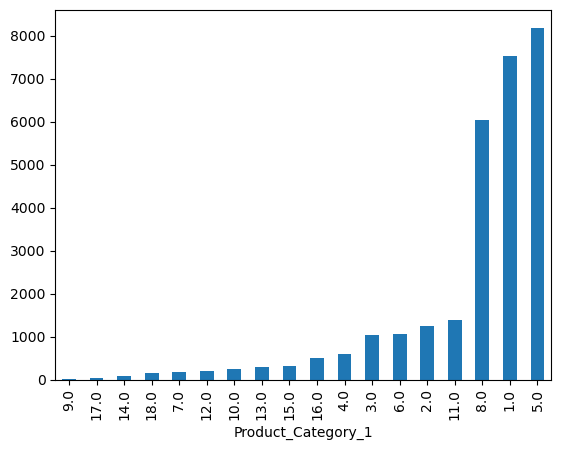

In [47]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')
# df.groupby('Product_Category_1').size().plot(kind='pie')

<Axes: xlabel='Product_Category_1'>

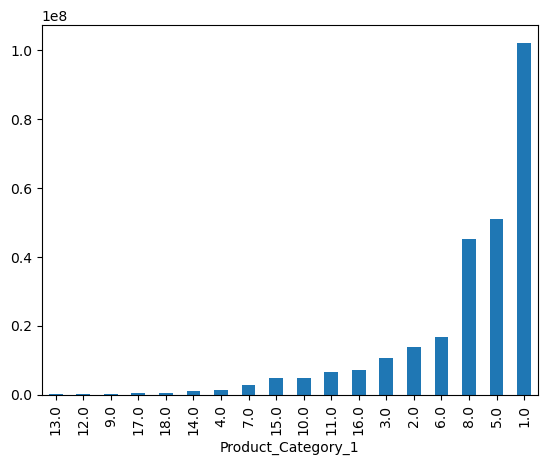

In [48]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

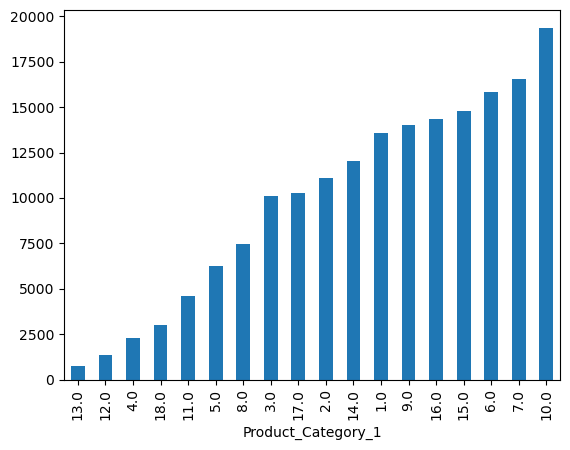

In [49]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

13 ka average kam hai bcuz it is buying less products as we can see from the graph and spending also less but as we look at 10 bought less pdts than 15 but spent more than 15 hence avergae bhaut zayda hogya 10 ka. Therefore it is important to do the analysis in this way

<Axes: xlabel='Product_ID'>

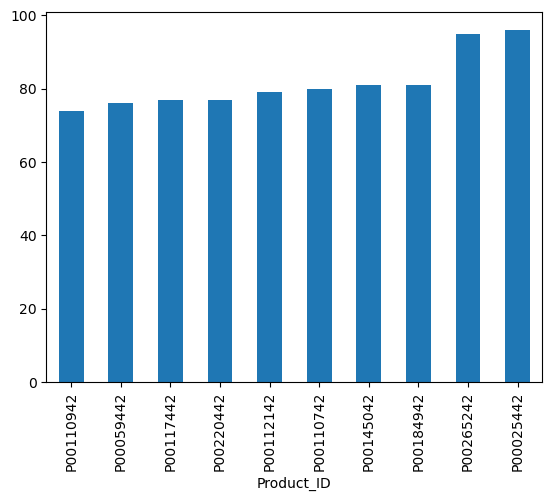

In [54]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar') #p00025442 has been sell the most! by looking at the graph we can conclude this.

<Axes: xlabel='Product_ID'>

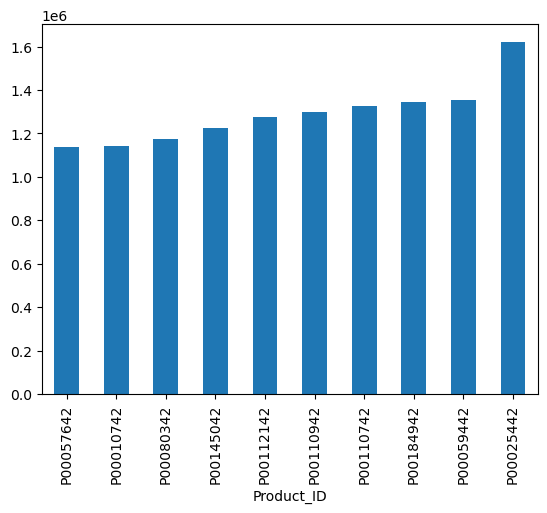

In [56]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar') #sbse zayda kharacha bhi 25442 id wale pdt pe hee hua hai

<Axes: xlabel='Product_ID'>

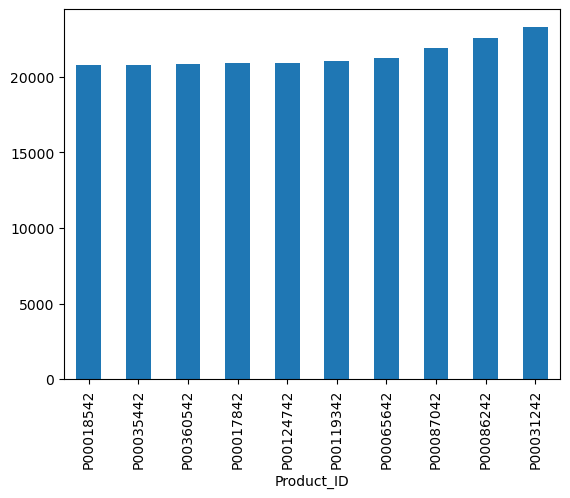

In [57]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')

In [59]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


<Axes: xlabel='Product_Category_1', ylabel='count'>

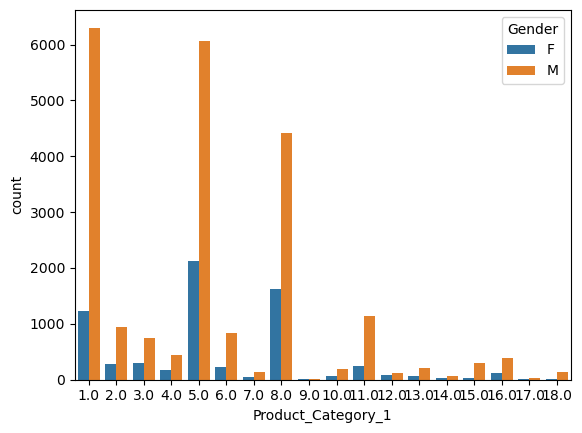

In [60]:
sns.countplot(x='Product_Category_1', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

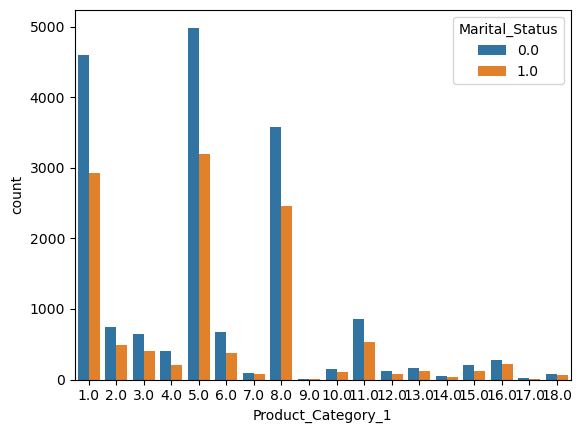

In [61]:
sns.countplot(x='Product_Category_1', hue='Marital_Status', data=df)

In [68]:
df.groupby(['Product_Category_1','Gender']).size()

Product_Category_1  Gender
1.0                 F         1221
                    M         6305
2.0                 F          287
                    M          950
3.0                 F          290
                    M          752
4.0                 F          168
                    M          437
5.0                 F         2128
                    M         6058
6.0                 F          220
                    M          830
7.0                 F           43
                    M          128
8.0                 F         1631
                    M         4416
9.0                 F            2
                    M           18
10.0                F           63
                    M          192
11.0                F          248
                    M         1146
12.0                F           83
                    M          119
13.0                F           73
                    M          214
14.0                F           26
                    M       

In [69]:
df.groupby(['Product_Category_1','Marital_Status']).size()

Product_Category_1  Marital_Status
1.0                 0.0               4601
                    1.0               2925
2.0                 0.0                743
                    1.0                494
3.0                 0.0                640
                    1.0                402
4.0                 0.0                398
                    1.0                207
5.0                 0.0               4985
                    1.0               3201
6.0                 0.0                667
                    1.0                383
7.0                 0.0                 93
                    1.0                 78
8.0                 0.0               3584
                    1.0               2463
9.0                 0.0                 11
                    1.0                  9
10.0                0.0                145
                    1.0                110
11.0                0.0                860
                    1.0                534
12.0               

### Combining age and Marital Status

In [107]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0


In [110]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))

In [111]:
df['Marital_Gender']=l

C:\Users\hp\AppData\Local\Temp\ipykernel_17944\2847889211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Gender']=l


In [112]:
df.sample(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
24876,1003829,P00354442,F,26-35,1.0,B,1,0.0,5.0,8.0,16.0,5397.0,F_0.0
26369,1004040,P00283942,M,26-35,20.0,B,2,1.0,5.0,8.0,16.0,5349.0,M_1.0
21254,1003361,P00318742,M,26-35,4.0,B,0,0.0,1.0,8.0,16.0,15173.0,M_0.0
15209,1002263,P00006242,M,26-35,6.0,C,2,1.0,5.0,8.0,16.0,3457.0,M_1.0
16526,1002544,P00210042,M,46-50,1.0,B,1,0.0,8.0,14.0,16.0,10051.0,M_0.0
2745,1000438,P00318142,M,18-25,11.0,A,3,0.0,2.0,8.0,16.0,13129.0,M_0.0


<Axes: xlabel='Marital_Gender', ylabel='count'>

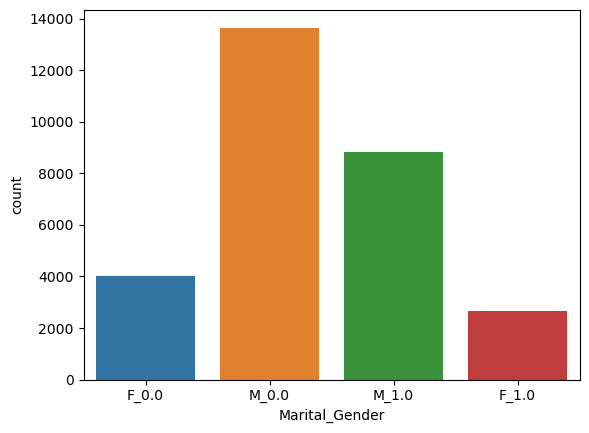

In [113]:
sns.countplot(x='Marital_Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='count'>

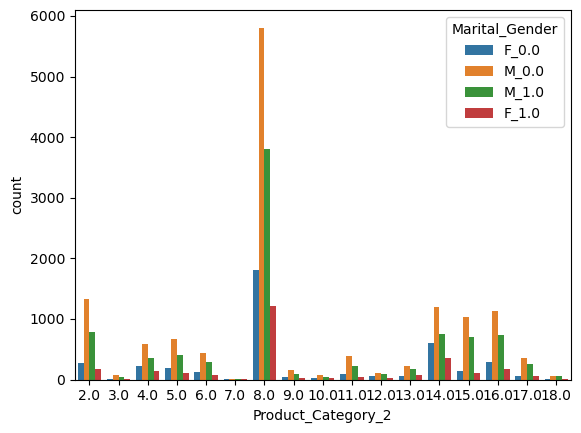

In [114]:
sns.countplot(x='Product_Category_2', hue='Marital_Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

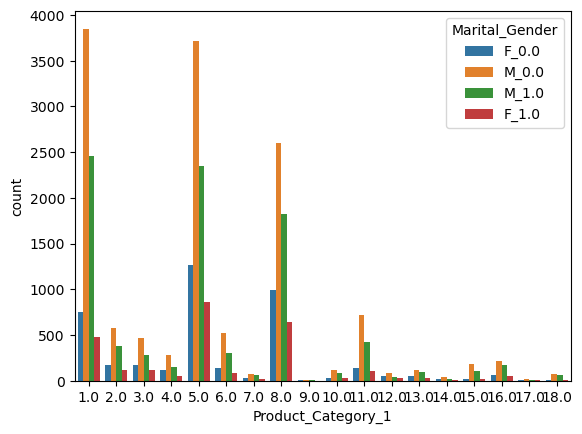

In [115]:
sns.countplot(x='Product_Category_1', hue='Marital_Gender', data=df)

<Axes: xlabel='Age', ylabel='count'>

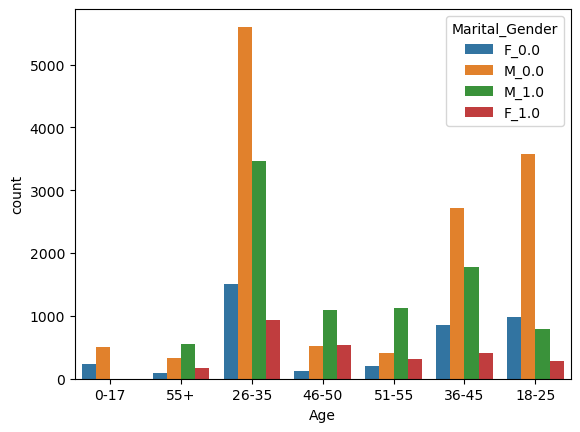

In [116]:
sns.countplot(x='Age', hue='Marital_Gender', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

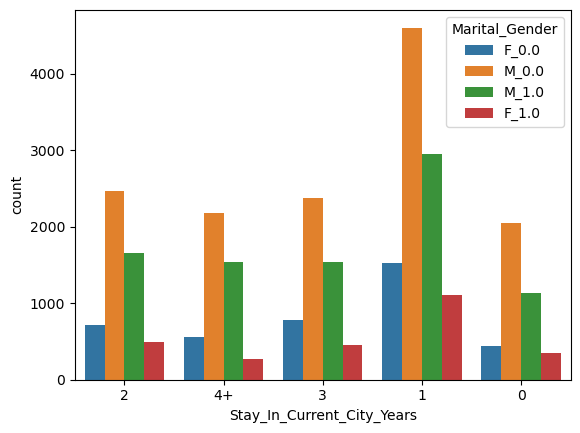

In [117]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Marital_Gender', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

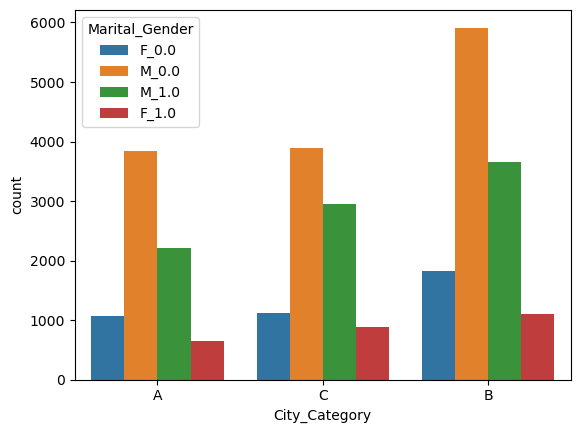

In [118]:
sns.countplot(x='City_Category', hue='Marital_Gender', data=df)

In [119]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0,M_0.0


In [121]:
l1=[]
for i in range(len(df)):
    l1.append(df['Gender'][i]+'_'+df['City_Category'][i])

In [122]:
df['Gender_in_city']=l1

C:\Users\hp\AppData\Local\Temp\ipykernel_17944\1720658775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_in_city']=l1


In [123]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender,Gender_in_city
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8.0,16.0,8370.0,F_0.0,F_A
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,F_0.0,F_A
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,8.0,16.0,1422.0,F_0.0,F_A
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,16.0,1057.0,F_0.0,F_A
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,8.0,16.0,7969.0,M_0.0,M_C


<Axes: xlabel='Gender_in_city', ylabel='count'>

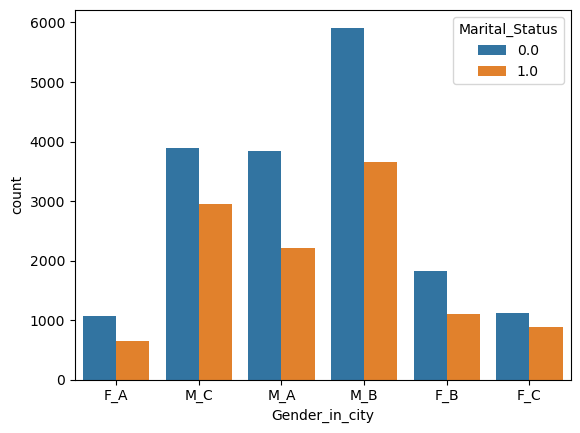

In [124]:
sns.countplot(x='Gender_in_city', hue='Marital_Status', data=df)

<Axes: xlabel='Gender_in_city'>

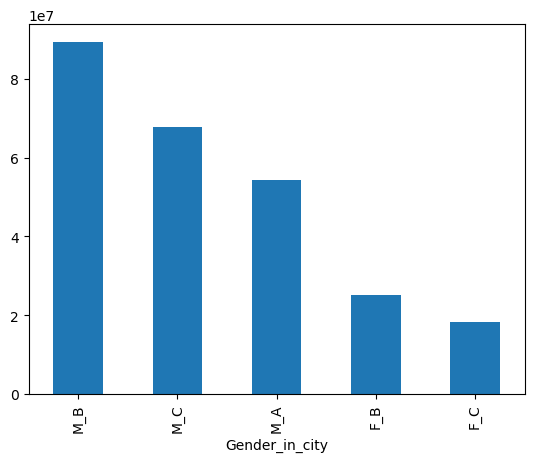

In [127]:
df.groupby('Gender_in_city')['Purchase'].sum().nlargest().plot(kind='bar')

In [128]:
df.groupby('Gender_in_city')['Purchase'].sum().nlargest()

Gender_in_city
M_B    89424597.0
M_C    67837239.0
M_A    54264547.0
F_B    25111989.0
F_C    18315928.0
Name: Purchase, dtype: float64

<Axes: ylabel='Age'>

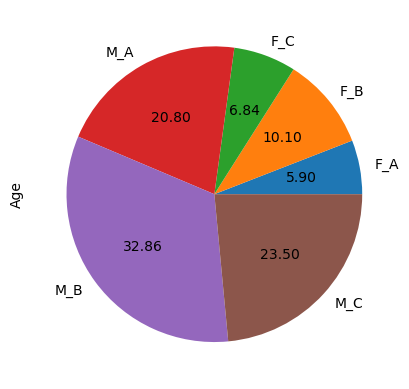

In [130]:
df.groupby('Gender_in_city')['Age'].count().plot(kind='pie', autopct='%.2f')

In [137]:
df.groupby(['Gender_in_city','Age']).size()

Gender_in_city  Age  
F_A             0-17       98
                18-25     286
                26-35     817
                36-45     336
                46-50      58
                51-55      99
                55+        25
F_B             0-17       77
                18-25     622
                26-35    1045
                36-45     513
                46-50     354
                51-55     260
                55+        69
F_C             0-17       64
                18-25     356
                26-35     571
                36-45     405
                46-50     261
                51-55     163
                55+       171
M_A             0-17       48
                18-25    1276
                26-35    2861
                36-45    1137
                46-50     312
                51-55     225
                55+       196
M_B             0-17      162
                18-25    1862
                26-35    3952
                36-45    1959
                46

<Axes: xlabel='Gender_in_city,Age'>

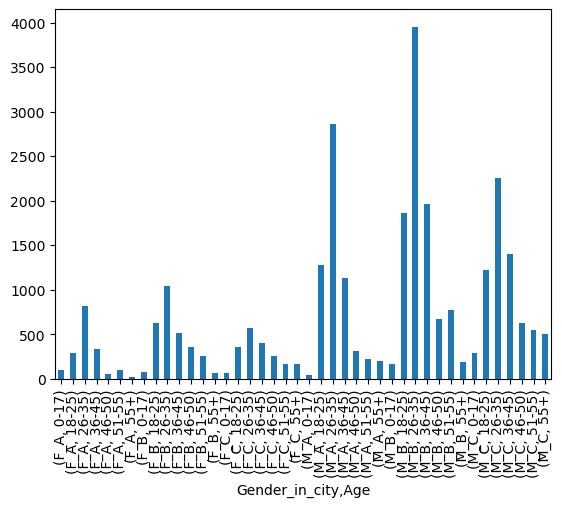

In [138]:
df.groupby(['Gender_in_city','Age']).size().plot(kind='bar')